In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
listings = pd.read_csv('./listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
listings.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
listings_df = listings[['host_total_listings_count','room_type','accommodates','bathrooms', 'bedrooms',
                        'beds','price','cleaning_fee','guests_included', 
                        'review_scores_value','instant_bookable','cancellation_policy',
                        'calculated_host_listings_count','reviews_per_month']]
listings_df.columns[listings_df.isna().mean()>0]

Index(['host_total_listings_count', 'bathrooms', 'bedrooms', 'beds',
       'cleaning_fee', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_total_listings_count       3816 non-null   float64
 1   room_type                       3818 non-null   object 
 2   accommodates                    3818 non-null   int64  
 3   bathrooms                       3802 non-null   float64
 4   bedrooms                        3812 non-null   float64
 5   beds                            3817 non-null   float64
 6   price                           3818 non-null   object 
 7   cleaning_fee                    2788 non-null   object 
 8   guests_included                 3818 non-null   int64  
 9   review_scores_value             3162 non-null   float64
 10  instant_bookable                3818 non-null   object 
 11  cancellation_policy             3818 non-null   object 
 12  calculated_host_listings_count  38

## Data Preprocessing 

In [6]:
## clean currency related columns
listings_df['price'] = listings_df['price'].str.replace('$','')
listings_df['price'] = listings_df['price'].str.replace(',','')
listings_df['price'] = pd.to_numeric(listings_df['price'])

/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_85360/3599188373.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_df['price'] = listings_df['price'].str.replace('$','')
/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_85360/3599188373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df['price'] = listings_df['price'].str.replace('$','')
/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_85360/3599188373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [7]:
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace('$','')
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace(',','')
listings_df['cleaning_fee'] = pd.to_numeric(listings_df['cleaning_fee'])

/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_85360/1316099925.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace('$','')
/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_85360/1316099925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace('$','')
/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_85360/1316099925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [8]:
# Clean numeric data
num_v = listings_df.select_dtypes(include=['int','float']).columns
for v in num_v:
    listings_df.loc[:,v] = listings_df[v].fillna(listings_df[v].mean())

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [9]:
# clean and dummy categorical and boolean data
cat_bool_vars = listings_df.select_dtypes(include=['object','bool']).columns
cat_bool_vars
for var in cat_bool_vars:
    listings_df = pd.concat([listings_df.drop(var, axis=1), pd.get_dummies(listings_df[var], prefix=var, prefix_sep='_', drop_first=True)],
                         axis=1)



In [11]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_total_listings_count       3818 non-null   float64
 1   accommodates                    3818 non-null   int64  
 2   bathrooms                       3818 non-null   float64
 3   bedrooms                        3818 non-null   float64
 4   beds                            3818 non-null   float64
 5   price                           3818 non-null   float64
 6   cleaning_fee                    3818 non-null   float64
 7   guests_included                 3818 non-null   int64  
 8   review_scores_value             3818 non-null   float64
 9   calculated_host_listings_count  3818 non-null   int64  
 10  reviews_per_month               3818 non-null   float64
 11  room_type_Private room          3818 non-null   uint8  
 12  room_type_Shared room           38

In [12]:
listings_df.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,review_scores_value,calculated_host_listings_count,reviews_per_month,room_type_Private room,room_type_Shared room,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,4,1.0,1.0,1.0,85.0,61.710904,2,10.000000,2,4.070000,0,0,0,1,0
1,6.0,4,1.0,1.0,1.0,150.0,40.000000,1,10.000000,6,1.480000,0,0,0,0,1
2,2.0,11,4.5,5.0,7.0,975.0,300.000000,10,10.000000,2,1.150000,0,0,0,0,1
3,1.0,3,1.0,0.0,2.0,100.0,61.710904,1,9.452245,1,2.078919,0,0,0,0,0
4,2.0,6,2.0,3.0,3.0,450.0,125.000000,6,9.000000,1,0.890000,0,0,0,0,1


<AxesSubplot:>

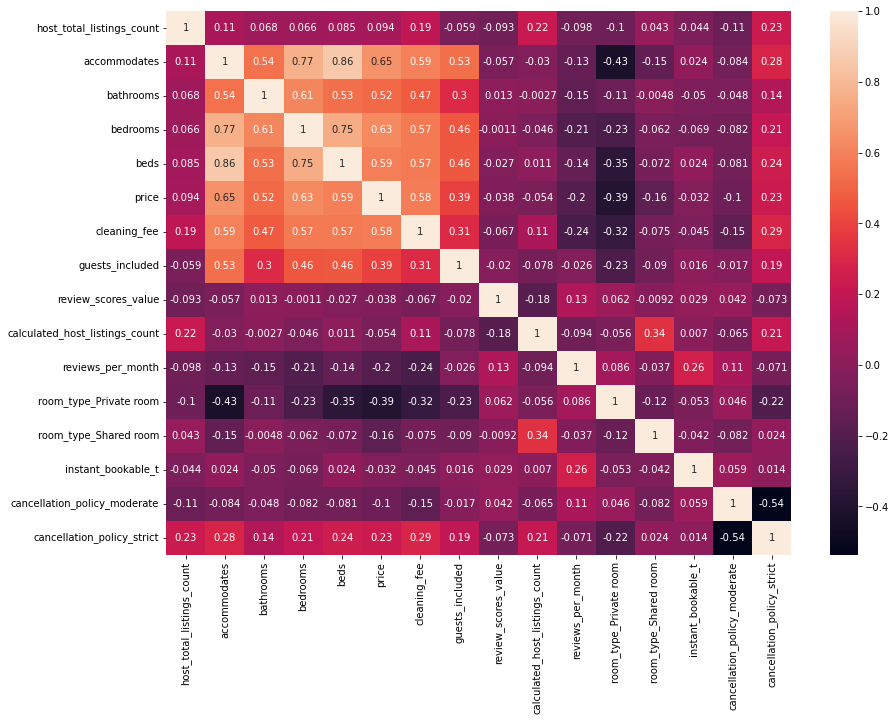

In [14]:
plt.figure(figsize=(14,10))
sb.heatmap(listings_df.corr(),annot=True)

In [16]:
# Price correlation
print(listings_df.corr()['price'])

host_total_listings_count         0.093938
accommodates                      0.652218
bathrooms                         0.516017
bedrooms                          0.627596
beds                              0.589306
price                             1.000000
cleaning_fee                      0.583274
guests_included                   0.392875
review_scores_value              -0.037939
calculated_host_listings_count   -0.054092
reviews_per_month                -0.199620
room_type_Private room           -0.387502
room_type_Shared room            -0.158473
instant_bookable_t               -0.031712
cancellation_policy_moderate     -0.102123
cancellation_policy_strict        0.226632
Name: price, dtype: float64


## Modeling and evaluation

In [24]:
y = listings_df['price']
X = listings_df.drop(columns = ['price'], inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)
y_test_predict = lm_model.predict(X_test)
y_train_predict = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('test_score: ',test_score)
print('train_score: ', train_score)
print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)),'\n')



test_score:  0.5632760007232607
train_score:  0.5541784075570706
The r-squared score for the model is 0.5632760007232607 on 1146 values. 



In [25]:
coef_df = pd.DataFrame()
coef_df['feature'] = X_train.columns
coef_df['coef'] = lm_model.coef_
coef_df['abs_coef'] = np.abs(lm_model.coef_)
coef_df = coef_df.sort_values(by=['abs_coef'], ascending=False)
print('Features by their impact on the price: \n', coef_df, '\n')


Features by their impact on the price: 
                            feature       coef   abs_coef
11           room_type_Shared room -57.586953  57.586953
10          room_type_Private room -36.095530  36.095530
2                        bathrooms  26.702718  26.702718
3                         bedrooms  19.349987  19.349987
1                     accommodates   8.427474   8.427474
13    cancellation_policy_moderate  -6.841197   6.841197
6                  guests_included   3.153084   3.153084
4                             beds  -2.677131   2.677131
9                reviews_per_month  -2.616315   2.616315
7              review_scores_value  -2.410776   2.410776
14      cancellation_policy_strict  -1.234586   1.234586
12              instant_bookable_t  -0.994194   0.994194
8   calculated_host_listings_count  -0.615147   0.615147
5                     cleaning_fee   0.487806   0.487806
0        host_total_listings_count  -0.012281   0.012281 



## Consusion

Here train score of the model is 55% and test score is 56%
Hence we can conclude that model is not overfitting 

Also from coef it is observed that price is highly impacted by room type and number of bathrooms and bedrooms. and it is less dependent on cleaning fee or review scores